In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, MultipleLocator, AutoMinorLocator
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, BoundaryNorm
from matplotlib.collections import LineCollection
from matplotlib import cm
from matplotlib import font_manager

import numpy as np
import time
import importlib
import os

import logging

importlib.reload(logging)
logging.basicConfig(level = logging.INFO)

os.environ['NUMEXPR_MAX_THREADS'] = '64'
os.environ['NUMEXPR_NUM_THREADS'] = '64'

%config InlineBackend. figure_format = 'retina'

In [82]:
def draw_summary(dictionary: dict={}, xlabel: str="AUC", file_name: str ="auc_summary", interval: int=20, xmin: float=0.75, xmax: float=1)-> plt.show():

    fig, ax = plt.subplots(1,1, figsize=(8,8)) 

    colors = ["green","red","blue","black"]
    linestyle = ["-","-.","--",":"]
    marker_list = ["v","o","^"]


    for i, element in enumerate(dictionary):
        for j, model in enumerate(dictionary[element]):
            center = dictionary[element][model][0]
            error = dictionary[element][model][1]
            plt.errorbar(x=center, y= interval/4*i + interval/16*(j+1), yerr=None, xerr=error, color=colors[i%4])
            plt.scatter(x=center, y= interval/4*i + interval/16*(j+1), marker=marker_list[j] , color=colors[i%4])  
#             plt.errorbar(x=center, y= interval/12*(i*3+j)+ interval/24, yerr=None, xerr=error, color=colors[i%4])
#             plt.scatter(x=center, y= interval/12*(i*3+j)+ interval/24, marker=marker_list[j], color=colors[i%4])


    plt.yticks([interval,interval*2,interval*3], ["","",""], fontsize=25, verticalalignment='center', horizontalalignment='right')
    ax.tick_params(axis='y', direction="in")
    # ax.tick_params(which='major', length=20, width=2,axis='y')
    plt.hlines(y=interval, xmin=xmin, xmax=xmax, color="k", linestyles="dashed", linewidth=2)
    plt.hlines(y=interval*2, xmin=xmin, xmax=xmax, color="k", linestyles="dashed", linewidth=2)
    plt.hlines(y=interval*3, xmin=xmin, xmax=xmax, color="k", linestyles="dashed", linewidth=2) #linestyles{'solid', 'dashed', 'dashdot', 'dotted'}
    plt.hlines(y=interval*4, xmin=xmin, xmax=xmax, color="k", linestyles="dashed", linewidth=2)

    ax.tick_params(axis='x', labelsize=15, direction = "in")
    ax.set_xlabel(str(xlabel), fontsize=20,horizontalalignment='right',x=1)
    ax.tick_params(axis='y', labelsize=15, direction = "in")
    ax.set_ylabel("Sample", fontsize=20, horizontalalignment='right',y=1)
    ax.yaxis.set_label_coords(-0.05,1.02)

    

    ax.set_yticks([interval/2,interval/2+interval*1,interval/2+interval*2,interval/2+interval*3], minor=True)
    ax.set_yticklabels(["Herwig Angular","Pythia Default","Pythia Vincia","Pythia Dipole"], fontsize=15, rotation=0, verticalalignment='center', horizontalalignment="right", minor=True)
    ax.tick_params(axis='y',which="minor", length=0, direction="in")

    plt.xlim((xmin,xmax))
    plt.ylim((0,5.2*interval))
    
#     plt.xscale("log")

    plt.hlines(y=0.9, xmin=0.8, xmax=0.8, color="green", linestyle="-", linewidth = 2, label="Herwig Ang. Classifier")
    plt.hlines(y=0.9, xmin=0.8, xmax=0.8, color="red",  linestyle="-", linewidth = 2, label="Pythia Def. Classifier")
    plt.hlines(y=0.9, xmin=0.8, xmax=0.8, color="blue",  linestyle="-", linewidth = 2, label="Pythia Vin. Classifier")
    plt.hlines(y=0.9, xmin=0.8, xmax=0.8, color="black",  linestyle="-", linewidth = 2, label="Pythia Dip. Classifier")
    plt.scatter(x=100, y=200, marker="v" , color="k", label="BDT") 
    plt.scatter(x=100, y=200, marker="^" , color="k", label="DNN") 
    plt.scatter(x=100, y=200, marker="o" , color="k", label="CNN") 

    plt.legend(loc="best",ncol=2,fontsize=15, edgecolor = "w",fancybox=False, framealpha=0)
    plt.savefig("./Plots/"+str(file_name)+".pdf", transparent=True, bbox_inches='tight')


    plt.show()

In [87]:
auc_dict = { 
            "sample_herwig_ang_model_herwig_ang": {"BDT":[0.82, 0.0058],"CNN":[0.90,0.0039], "DNN":[0.82,0.0056]},
            "sample_herwig_ang_model_pythia_def": {"BDT":[0.80, 0.0056],"CNN":[0.89,0.0043], "DNN":[0.81,0.0069]},
            "sample_herwig_ang_model_pythia_vin": {"BDT":[0.80, 0.0050],"CNN":[0.89,0.0044], "DNN":[0.81,0.0062]},
            "sample_herwig_ang_model_pythia_dip": {"BDT":[0.81, 0.0049],"CNN":[0.89,0.0044], "DNN":[0.81,0.0043]},
    
            "sample_pythia_def_model_herwig_ang": {"BDT":[0.84, 0.0055],"CNN":[0.91,0.0032], "DNN":[0.85,0.0057]},
            "sample_pythia_def_model_pythia_def": {"BDT":[0.86, 0.0043],"CNN":[0.92,0.0032], "DNN":[0.86,0.0047]},
            "sample_pythia_def_model_pythia_vin": {"BDT":[0.85, 0.0051],"CNN":[0.91,0.0035], "DNN":[0.86,0.0048]},
            "sample_pythia_def_model_pythia_dip": {"BDT":[0.85, 0.0042],"CNN":[0.91,0.0034], "DNN":[0.86,0.0039]},

            "sample_pythia_vin_model_herwig_ang": {"BDT":[0.86, 0.0040],"CNN":[0.93,0.0033], "DNN":[0.87,0.0059]},
            "sample_pythia_vin_model_pythia_def": {"BDT":[0.87, 0.0043],"CNN":[0.93,0.0035], "DNN":[0.87,0.0051]},
            "sample_pythia_vin_model_pythia_vin": {"BDT":[0.87, 0.0051],"CNN":[0.94,0.0031], "DNN":[0.88,0.0045]},
            "sample_pythia_vin_model_pythia_dip": {"BDT":[0.87, 0.0043],"CNN":[0.93,0.0034], "DNN":[0.87,0.0045]},
    
            "sample_pythia_dip_model_herwig_ang": {"BDT":[0.86, 0.0040],"CNN":[0.92,0.0027], "DNN":[0.86,0.0053]},
            "sample_pythia_dip_model_pythia_def": {"BDT":[0.86, 0.0045],"CNN":[0.93,0.0029], "DNN":[0.87,0.0045]},
            "sample_pythia_dip_model_pythia_vin": {"BDT":[0.87, 0.0043],"CNN":[0.93,0.0029], "DNN":[0.87,0.0042]},
            "sample_pythia_dip_model_pythia_dip": {"BDT":[0.87, 0.0046],"CNN":[0.93,0.0027], "DNN":[0.87,0.0048]},
            }

rej_dict = { 
            "sample_herwig_ang_model_herwig_ang": {"BDT":[10.91, 0.84],"CNN":[19.91,1.81], "DNN":[11.21,0.83]},
            "sample_herwig_ang_model_pythia_def": {"BDT":[9.34, 0.57],"CNN":[16.87, 1.43], "DNN":[9.81, 0.80]},
            "sample_herwig_ang_model_pythia_vin": {"BDT":[9.48, 0.57],"CNN":[17.70, 1.56], "DNN":[10.14, 0.85]},
            "sample_herwig_ang_model_pythia_dip": {"BDT":[10.19, 0.64],"CNN":[17.23, 1.55], "DNN":[10.60, 0.66]},
    
            "sample_pythia_def_model_herwig_ang": {"BDT":[15.94, 1.25],"CNN":[21.73, 1.55], "DNN":[16.80, 1.78]},
            "sample_pythia_def_model_pythia_def": {"BDT":[19.11, 1.67],"CNN":[28.23, 2.81], "DNN":[19.11, 1.51]},
            "sample_pythia_def_model_pythia_vin": {"BDT":[18.04, 1.57],"CNN":[24.15, 1.75], "DNN":[18.48, 1.89]},
            "sample_pythia_def_model_pythia_dip": {"BDT":[18.03, 1.51],"CNN":[24.07, 1.89], "DNN":[18.35, 1.52]},

            "sample_pythia_vin_model_herwig_ang": {"BDT":[24.47, 2.55],"CNN":[36.52, 3.84], "DNN":[25.94, 3.54]},
            "sample_pythia_vin_model_pythia_def": {"BDT":[27.80, 2.93],"CNN":[39.58, 5.73], "DNN":[28.45, 3.35]},
            "sample_pythia_vin_model_pythia_vin": {"BDT":[29.19, 3.05],"CNN":[47.66, 6.29], "DNN":[30.16, 3.26]},
            "sample_pythia_vin_model_pythia_dip": {"BDT":[28.01, 3.16],"CNN":[41.25, 4.51], "DNN":[29.28, 3.72]},
    
            "sample_pythia_dip_model_herwig_ang": {"BDT":[22.01, 2.52],"CNN":[33.10, 3.97], "DNN":[22.96, 2.91]},
            "sample_pythia_dip_model_pythia_def": {"BDT":[22.73, 2.40],"CNN":[35.18, 4.26], "DNN":[23.75, 2.48]},
            "sample_pythia_dip_model_pythia_vin": {"BDT":[23.63, 2.58],"CNN":[36.84, 4.86], "DNN":[24.19, 2.12]},
            "sample_pythia_dip_model_pythia_dip": {"BDT":[24.56, 2.72],"CNN":[41.11, 6.17], "DNN":[24.65, 2.31]},
            }

sig_imp_dict = { 
            "sample_herwig_ang_model_herwig_ang": {"BDT":[1.86, 0.31],"CNN":[2.73, 0.72], "DNN":[1.92, 0.29]},
            "sample_herwig_ang_model_pythia_def": {"BDT":[1.86, 0.45],"CNN":[2.37, 0.48], "DNN":[1.88, 0.46]},
            "sample_herwig_ang_model_pythia_vin": {"BDT":[1.83, 0.30],"CNN":[2.40, 0.41], "DNN":[1.89, 0.42]},
            "sample_herwig_ang_model_pythia_dip": {"BDT":[1.90, 0.34],"CNN":[2.43, 0.49], "DNN":[1.88, 0.40]},
    
            "sample_pythia_def_model_herwig_ang": {"BDT":[2.46, 0.44],"CNN":[2.87, 0.59], "DNN":[3.10, 0.73]},
            "sample_pythia_def_model_pythia_def": {"BDT":[3.64, 0.94],"CNN":[3.68, 0.88], "DNN":[3.56, 0.93]},
            "sample_pythia_def_model_pythia_vin": {"BDT":[3.12, 0.86],"CNN":[3.12, 0.92], "DNN":[3.24, 0.77]},
            "sample_pythia_def_model_pythia_dip": {"BDT":[3.06, 0.78],"CNN":[3.19, 0.91], "DNN":[3.36, 0.81]},

            "sample_pythia_vin_model_herwig_ang": {"BDT":[4.45, 1.24],"CNN":[5.11, 1.26], "DNN":[5.34, 1.27]},
            "sample_pythia_vin_model_pythia_def": {"BDT":[5.64, 1.48],"CNN":[5.24, 1.57], "DNN":[5.62, 1.37]},
            "sample_pythia_vin_model_pythia_vin": {"BDT":[6.00, 1.79],"CNN":[5.81, 1.56], "DNN":[5.77, 1.45]},
            "sample_pythia_vin_model_pythia_dip": {"BDT":[5.29, 1.30],"CNN":[5.48, 1.46], "DNN":[5.82, 1.56]},
    
            "sample_pythia_dip_model_herwig_ang": {"BDT":[3.83, 1.05],"CNN":[4.60, 1.48], "DNN":[4.25, 1.10]},
            "sample_pythia_dip_model_pythia_def": {"BDT":[4.47, 1.14],"CNN":[4.67, 1.28], "DNN":[4.69, 1.33]},
            "sample_pythia_dip_model_pythia_vin": {"BDT":[4.29, 1.09],"CNN":[4.85, 1.43], "DNN":[4.42, 1.20]},
            "sample_pythia_dip_model_pythia_dip": {"BDT":[4.57, 1.10],"CNN":[5.28, 1.62], "DNN":[4.61, 1.18]},
            }


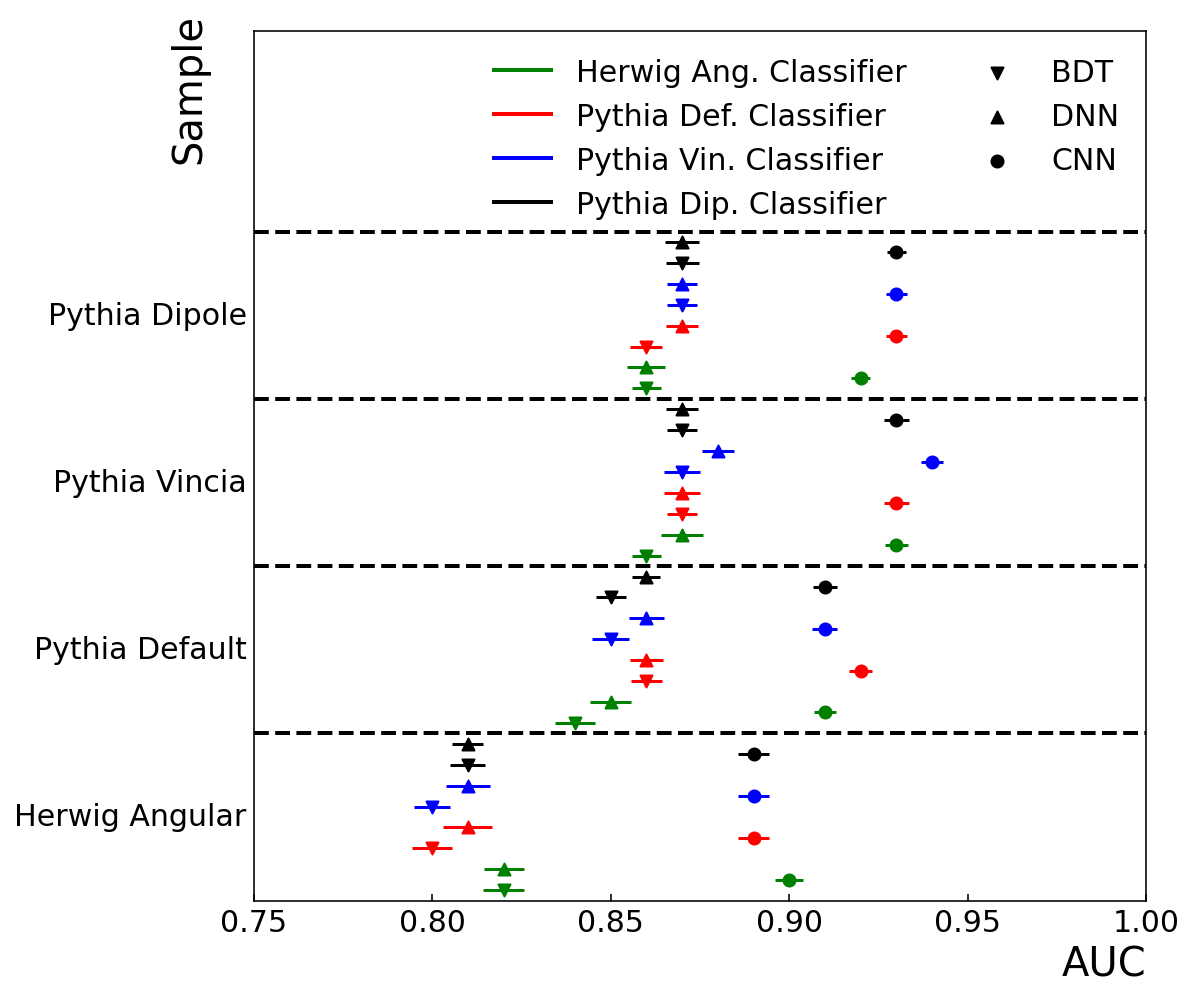

In [88]:
draw_summary(dictionary = auc_dict, xlabel="AUC", file_name="auc_summary", interval=20, xmin=0.75, xmax=1)

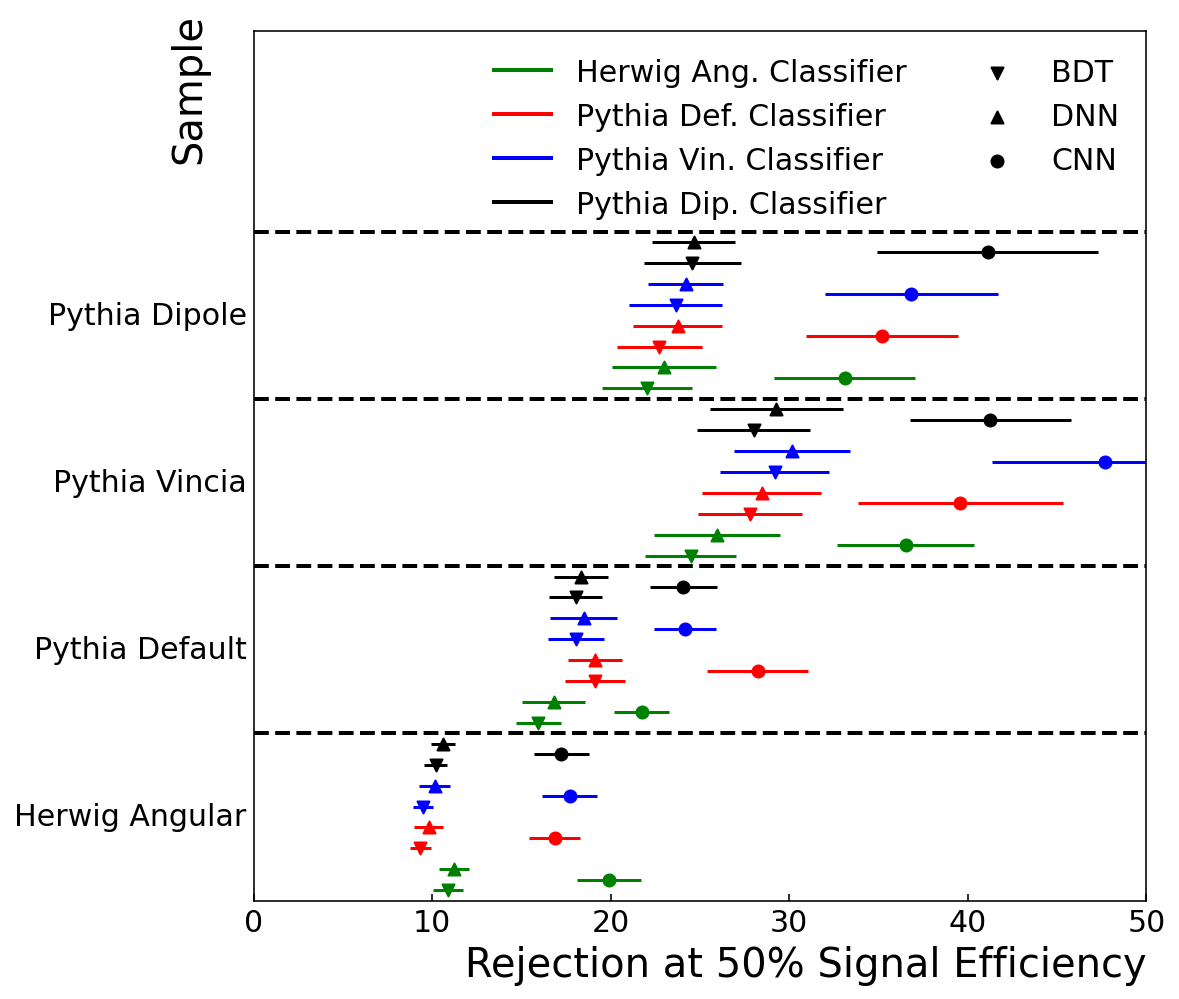

In [89]:
draw_summary(dictionary = rej_dict, xlabel="Rejection at 50% Signal Efficiency", file_name="rej_summary", interval=20, xmin=0, xmax=50)

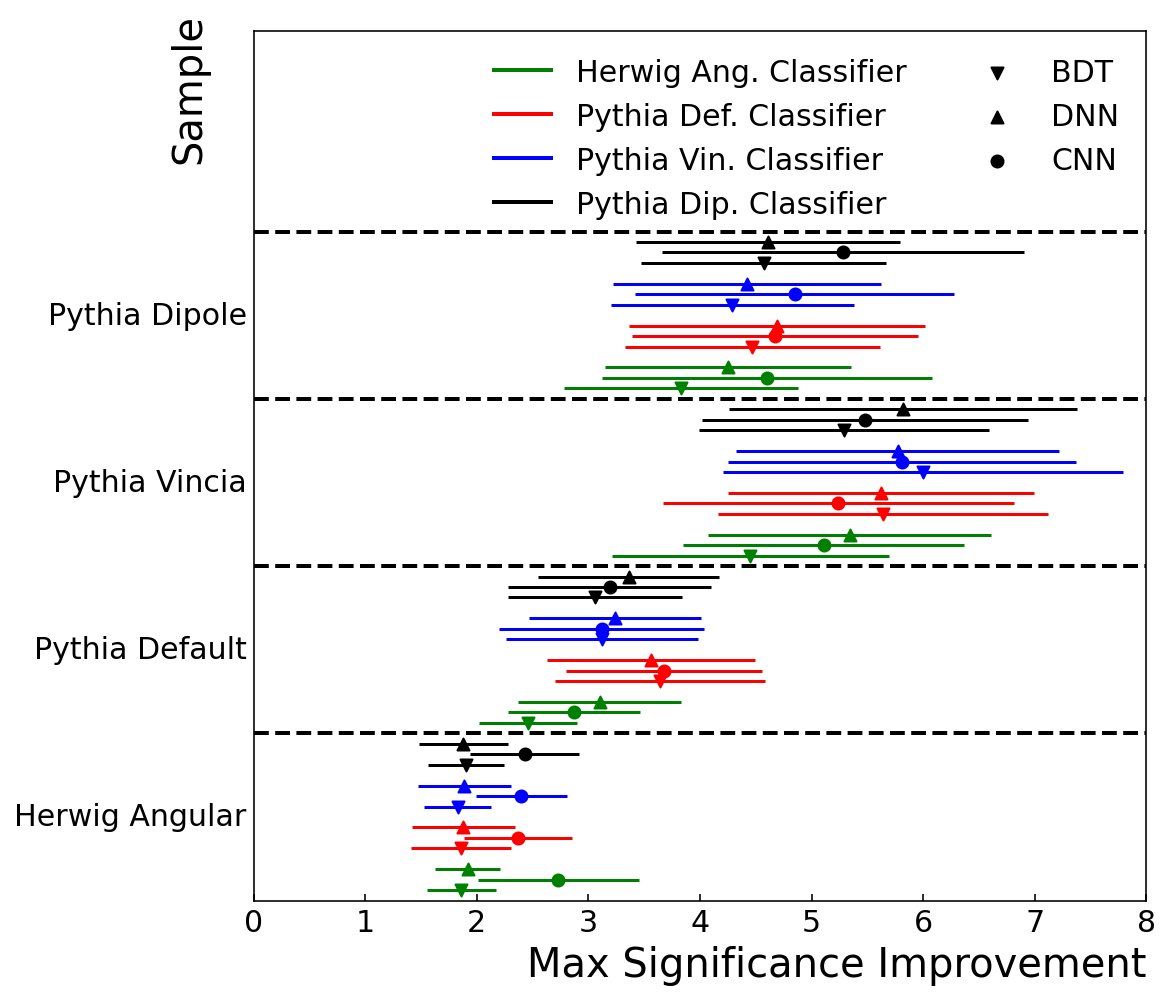

In [90]:
draw_summary(dictionary = sig_imp_dict, xlabel="Max Significance Improvement", file_name="sig_summary", interval=20, xmin=0, xmax=8)